### Biblioteca

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# ANÁLISE INICIAL

In [ ]:
# Carregando o dataset
df = pd.read_csv('auto_industry.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
# Consultando os tipos de feature
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [ ]:
# Consultando as medidas de centralidade
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


O dataset possui 9 features e 398 observações. Entre as features, 7 são numéricas e 2 são objetos. A partir das medidas de centralidade, podemos observar que:  
* Os modelos de carros variam entre 1970 e 1982;  
* O dataset informa 3 regiões de origem: USA, Japão e Europa;  
* A medida de peso tem uma desvio padrão de 846,84, portanto se observa uma grande dispersão desse dado;
* Existem carros de 3 cilindros para o intervalo de tempo observado.

A base dados é relativamente pobre no sentido de não oferecer informações quanto as grandezas tratadas, o que pode causar problemas para conversão de uma medida ou outra como no caso de haver nulos, por exemplo: o displacement se levar em conta o periodo provavelmente está em polegadas cúbicas

# TRANSFORMAÇÃO

In [ ]:
# Cria feature para continentes com base em origin
continentes = {'usa':'America do Norte', 'europe' : 'Europa', 'japan' : 'Asia'}
df['continentes'] = df['origin'].map(continentes)

df['origin'] = df['origin'].str.capitalize()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,continentes
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,America do Norte
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,America do Norte
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,America do Norte
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,America do Norte
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,America do Norte
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,ford mustang gl,America do Norte
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,vw pickup,Europa
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,dodge rampage,America do Norte
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ford ranger,America do Norte


In [ ]:
# Separa name em marca e modelo
df[['marca','modelo']] = df['name'].str.split(' ', n=1, expand=True)

# Retira feature original name
df.drop(columns= ['name'],inplace = True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,continentes,marca,modelo
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,America do Norte,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,America do Norte,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,America do Norte,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,America do Norte,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,America do Norte,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,America do Norte,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,Europa,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,America do Norte,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,America do Norte,ford,ranger


In [ ]:
# Converte mpg em kml
df['kml'] = df['mpg'] / 2.352
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,continentes,marca,modelo,kml
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,America do Norte,chevrolet,chevelle malibu,7.653061
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,America do Norte,buick,skylark 320,6.377551
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,America do Norte,plymouth,satellite,7.653061
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,America do Norte,amc,rebel sst,6.802721
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,America do Norte,ford,torino,7.227891
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,America do Norte,ford,mustang gl,11.479592
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,Europa,vw,pickup,18.707483
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,America do Norte,dodge,rampage,13.605442
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,America do Norte,ford,ranger,11.904762


# LIMPEZA

In [ ]:
# Verifica o número de NaNs
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
continentes     0
marca           0
modelo          2
kml             0
dtype: int64

In [ ]:
# Verifica a proporção de NaNs
df.isnull().sum()/len(df)

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      0.015075
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
continentes     0.000000
marca           0.000000
modelo          0.005025
kml             0.000000
dtype: float64

Identificamos NaNs em ``` modelo ``` e ``` horsepower ```.  

Como eram apenas 2 casos nulos em **modelo**, optamos por realizar pesquisa complementar e substituir os valores.  

Para **horsepower**, criamos um loop for para puxar no dataset características do veículo, como: ano de fabricação, origem e cilindros, para termos uma média de horsepowers mais precisa e assim substituir os NaN por um valor aproximado de HPs para o veículo.

In [ ]:
# Quem são os NaN em modelo?
df.loc[df.modelo.isna() == True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,continentes,marca,modelo,kml
150,26.0,4,108.0,93.0,2391,15.5,74,Japan,Asia,subaru,None,11.054422
346,32.3,4,97.0,67.0,2065,17.8,81,Japan,Asia,subaru,None,13.732993


In [ ]:
# Tratando os NaNs em modelo: pesquisa complementar
df = df.fillna({'modelo':'leone'})

In [ ]:
# Quem são os NaNs em horsepower?
df.loc[df.horsepower.isna() == True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,continentes,marca,modelo,kml
32,25.0,4,98.0,NaN,2046,19.0,71,Usa,America do Norte,ford,pinto,10.629252
126,21.0,6,200.0,NaN,2875,17.0,74,Usa,America do Norte,ford,maverick,8.928571
330,40.9,4,85.0,NaN,1835,17.3,80,Europe,Europa,renault,lecar deluxe,17.389456
336,23.6,4,140.0,NaN,2905,14.3,80,Usa,America do Norte,ford,mustang cobra,10.034014
354,34.5,4,100.0,NaN,2320,15.8,81,Europe,Europa,renault,18i,14.668367
374,23.0,4,151.0,NaN,3035,20.5,82,Usa,America do Norte,amc,concord dl,9.778912


In [ ]:
df_na = df.loc[df.horsepower.isna() == True]
df_na

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,continentes,marca,modelo,kml
32,25.0,4,98.0,NaN,2046,19.0,71,Usa,America do Norte,ford,pinto,10.629252
126,21.0,6,200.0,NaN,2875,17.0,74,Usa,America do Norte,ford,maverick,8.928571
330,40.9,4,85.0,NaN,1835,17.3,80,Europe,Europa,renault,lecar deluxe,17.389456
336,23.6,4,140.0,NaN,2905,14.3,80,Usa,America do Norte,ford,mustang cobra,10.034014
354,34.5,4,100.0,NaN,2320,15.8,81,Europe,Europa,renault,18i,14.668367
374,23.0,4,151.0,NaN,3035,20.5,82,Usa,America do Norte,amc,concord dl,9.778912


### PRIMEIRO LOCALIZAMOS ONDE ESTAVAM OS NULL


In [ ]:
index = df_na['origin'].index
for i in index:
    origin_cars = df.loc[df.origin == df_na.origin[i]]
    filtro = origin_cars.model_year <= df_na.model_year[i] 
    cars_by_time = origin_cars.loc[filtro]
    filtro_2 = cars_by_time.cylinders == df_na.cylinders[i]
    cars_by_cylinders = cars_by_time.loc[filtro_2]
    hp_mean = cars_by_cylinders['horsepower'].mean()
    df['horsepower'][i] = hp_mean

df    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,continentes,marca,modelo,kml
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,America do Norte,chevrolet,chevelle malibu,7.653061
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,America do Norte,buick,skylark 320,6.377551
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,America do Norte,plymouth,satellite,7.653061
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,America do Norte,amc,rebel sst,6.802721
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,America do Norte,ford,torino,7.227891
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,America do Norte,ford,mustang gl,11.479592
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,Europa,vw,pickup,18.707483
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,America do Norte,dodge,rampage,13.605442
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,America do Norte,ford,ranger,11.904762


In [ ]:
df.loc[df.horsepower.isna() == True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,continentes,marca,modelo,kml


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
continentes     0
marca           0
modelo          0
kml             0
dtype: int64

# VERIFICANDO DUPLICATAS

In [ ]:
# Não localizamos valores duplicados no dataset
df.duplicated().sum()

0

# ANÁLISE

### NÚMERO DE MODELOS EM ANOS PARES


In [ ]:
filtro = df.model_year % 2 == 0
df.loc[filtro]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,continentes,marca,modelo,kml
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,America do Norte,chevrolet,chevelle malibu,7.653061
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,America do Norte,buick,skylark 320,6.377551
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,America do Norte,plymouth,satellite,7.653061
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,America do Norte,amc,rebel sst,6.802721
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,America do Norte,ford,torino,7.227891
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,America do Norte,ford,mustang gl,11.479592
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,Europa,vw,pickup,18.707483
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,America do Norte,dodge,rampage,13.605442
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,America do Norte,ford,ranger,11.904762


In [ ]:
# Converte model_year para o formato data
df['model_year'] = pd.to_datetime(df['model_year'], format="%y")

### ANÁLISE POR ORIGEM 

In [ ]:
df.groupby(['origin']).get_group('Usa')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,continentes,marca,modelo,kml
0,18.0,8,307.0,130.0,3504,12.0,1970-01-01,Usa,America do Norte,chevrolet,chevelle malibu,7.653061
1,15.0,8,350.0,165.0,3693,11.5,1970-01-01,Usa,America do Norte,buick,skylark 320,6.377551
2,18.0,8,318.0,150.0,3436,11.0,1970-01-01,Usa,America do Norte,plymouth,satellite,7.653061
3,16.0,8,304.0,150.0,3433,12.0,1970-01-01,Usa,America do Norte,amc,rebel sst,6.802721
4,17.0,8,302.0,140.0,3449,10.5,1970-01-01,Usa,America do Norte,ford,torino,7.227891
...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,1982-01-01,Usa,America do Norte,chevrolet,camaro,11.479592
393,27.0,4,140.0,86.0,2790,15.6,1982-01-01,Usa,America do Norte,ford,mustang gl,11.479592
395,32.0,4,135.0,84.0,2295,11.6,1982-01-01,Usa,America do Norte,dodge,rampage,13.605442
396,28.0,4,120.0,79.0,2625,18.6,1982-01-01,Usa,America do Norte,ford,ranger,11.904762


[Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982')]

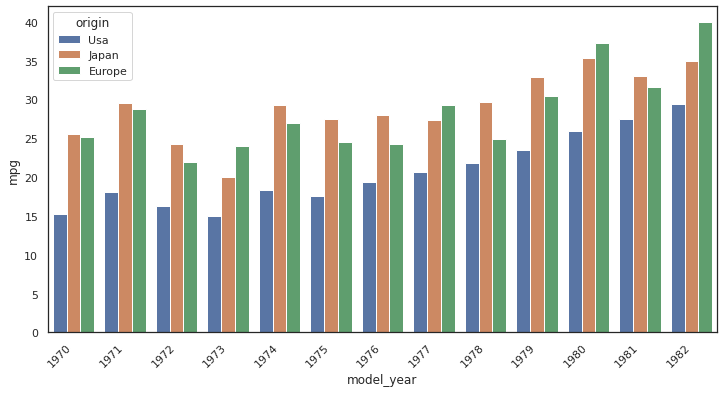

In [ ]:
# Média do mpg por origin e por ano
fig, ax = plt.subplots(figsize = (12,6)) 
sns.barplot(x='model_year', y='mpg', hue='origin', ci = None, data=df, estimator=np.mean)

x_dates = df['model_year'].dt.strftime('%Y').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

[Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982')]

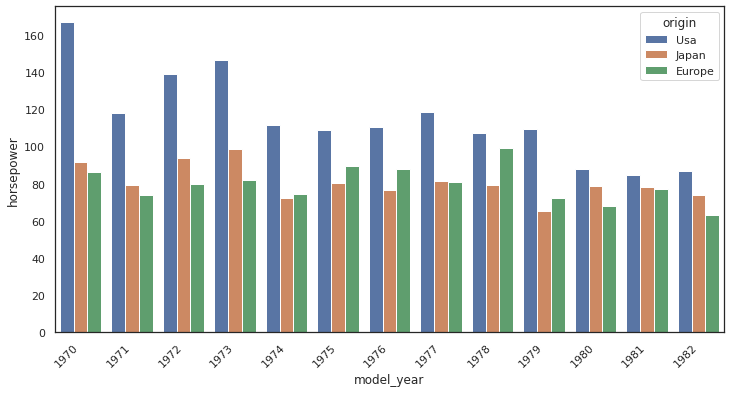

In [ ]:
# Média do horsepower por origin e por ano
fig, ax = plt.subplots(figsize = (12,6)) 
sns.barplot(x='model_year', y='horsepower', hue='origin', ci=None, data=df, estimator=np.mean)

x_dates = df['model_year'].dt.strftime('%Y').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

[Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982')]

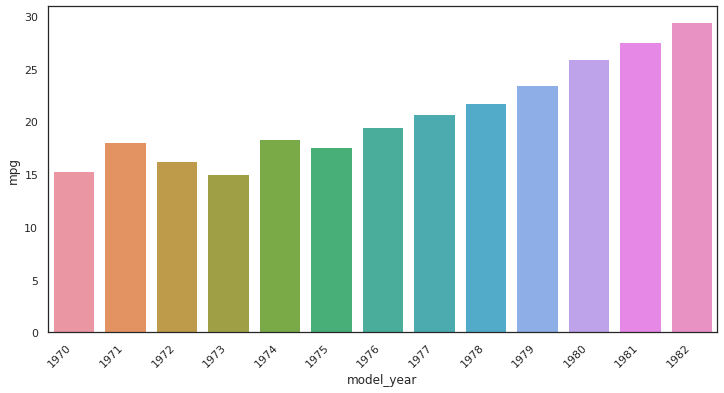

In [ ]:
# Plot série histórica EUA mpg
usa_cars = df.loc[df.origin == 'Usa']

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "model_year", y = "mpg", data = usa_cars, 
                  estimator = np.mean, ci = None, ax=ax)

x_dates = df['model_year'].dt.strftime('%Y').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

[Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982')]

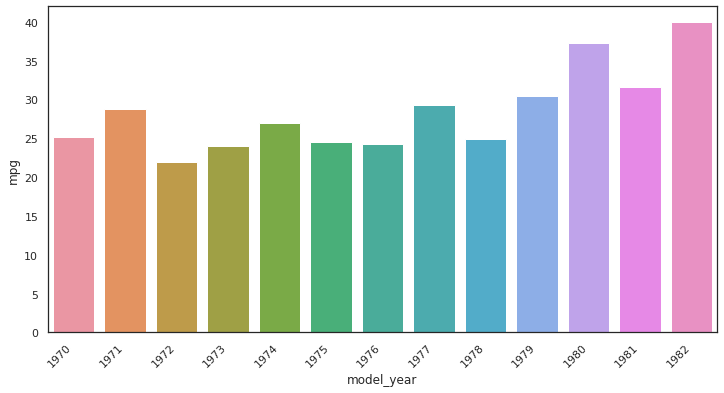

In [ ]:
# Plot série histórica Europa mpg
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "model_year", y = "mpg", data = europe_cars, 
                  estimator = np.mean, ci = None, ax=ax)

x_dates = df['model_year'].dt.strftime('%Y').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')


[Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982')]

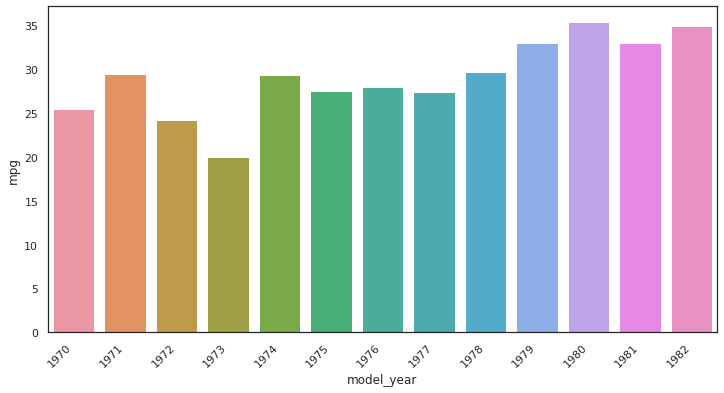

In [ ]:
# Plot série histórica Japão mpg
fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "model_year", y = "mpg", data = Japan_cars, 
                  estimator = np.mean, ci = None, ax=ax)

x_dates = df['model_year'].dt.strftime('%Y').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

### CRISE DE PETRÓLEO

As duas crises do petróleo moldaram os carros dos anos 70. 
Com escassez de combustível, os japoneses brilharam no mercado americano com carros pequenos, baratos e econômicos. Marcas como Toyota, Honda e Datsun cresceram rapidamente em vendas, mais que alemãs e francesas.

Por outro lado, as marcas americanas ainda insistiam em grandes V8 “big block”, mas no geral, seus carros começaram a reduzir de tamanho. A economia forçada já ditava as regras.

Na Europa, os carros começaram a ficar bem modernos. A Fiat era outra que dominava nos carros pequenos, mas luxuosos como Mercedes-Benz e BMW ampliaram rapidamente suas vendas com modelos menores e mais baratos. A economia com a crise do petróleo não foi problema para os europeus, pois já estavam acostumados com essa situação no pós-guerra.

Adaptado de: https://www.noticiasautomotivas.com.br/como-eram-os-carros-antigamente/#Decada_de_1970

In [ ]:
df_MPG = pd.pivot_table(data=df,index=['model_year','cylinders'], aggfunc={'mpg':np.mean})
df_MPG

mpg
model_year cylinders           
1970-01-01 4          25.285714
           6          20.500000
           8          14.111111
1971-01-01 4          27.461538
           6          18.000000
           8          13.428571
1972-01-01 3          19.000000
           4          23.428571
           8          13.615385
1973-01-01 3          18.000000
           4          22.727273
           6          19.000000
           8          13.200000
1974-01-01 4          27.800000
           6          17.857143
           8          14.200000
1975-01-01 4          25.250000
           6          17.583333
           8          15.666667
1976-01-01 4          26.766667
           6          20.000000
           8          14.666667
1977-01-01 3          21.500000
           4          29.107143
           6          19.500000
           8          16.000000
1978-01-01 4          29.576471
           5          20.300000
           6          19.066667
           8          19.050000
1979-01-01 4          31.525000
           5          25.400000
           6          22.950000
           8          18.630000
1980-01-01 3          23.700000
           4          34.612000
           5          36.400000
           6          25.900000
1981-01-01 4          32.814286
           6          23.428571
           8          26.600000
1982-01-01 4          32.071429
           6          28.333333

### INSIGHTS:

- Aumento de números de cilindros significa menos mpg (milhas por galão), logo é menos economico.
- Diminuição da quantidade de carros de 8 cilindros com o avançar do tempo
- Aumento da eficiência dos motores (mpg) com passar dos anos

### MÉDIA DE HORSEPOWER

In [ ]:
df.groupby(['origin','cylinders']).agg({'horsepower':'mean'}).reset_index()

,origin,cylinders,horsepower
0,Europe,4,78.328989
1,Europe,5,82.333333
2,Europe,6,113.500000
3,Japan,3,99.250000
4,Japan,4,75.579710
5,Japan,6,115.833333
6,Usa,4,80.934630
7,Usa,6,99.655676
8,Usa,8,158.300971


In [ ]:
x = df.groupby(['origin','cylinders', pd.Grouper(key='modelo')])['horsepower'].agg([np.mean]).reset_index()


df_ = pd.pivot_table(data=x,index=['origin','cylinders','modelo'], margins = True)
df_.query('cylinders == [3]')

mean
origin cylinders modelo          
Japan  3         rx-4       110.0
                 rx-7 gs    100.0
                 rx2 coupe   97.0
                 rx3         90.0

No caso do Japão, observamos que a média dos carros de 3 cilindros é maior do que a média dos carros de 4 cilindros. Em pesquisas complementares, encontramos que esse fato se deve às inovações tecnológicas que os carros de 3 cilindros apresentavam.

In [ ]:
df.groupby(['origin','cylinders']).agg({'cylinders':['size']}).reset_index()

origin cylinders     
                    size
0  Europe         4   63
1  Europe         5    3
2  Europe         6    4
3   Japan         3    4
4   Japan         4   69
5   Japan         6    6
6     Usa         4   72
7     Usa         6   74
8     Usa         8  103

### EVOLUÇÃO MÉDIA DE CONSUMO (2 ANOS)

In [ ]:
x = df.groupby(['origin','cylinders', pd.Grouper(key='model_year', freq='2AS')])['mpg'].agg([np.mean]).reset_index()

df_MPGX = pd.pivot_table(data=x,index=['origin','cylinders','model_year'])
df_MPGX

mean
origin cylinders model_year           
Europe 4         1970-01-01  26.777778
                 1972-01-01  23.166667
                 1974-01-01  25.750000
                 1976-01-01  26.772727
                 1978-01-01  32.100000
                 1980-01-01  35.890909
                 1982-01-01  40.000000
       5         1978-01-01  22.850000
                 1980-01-01  36.400000
       6         1976-01-01  16.500000
                 1978-01-01  16.600000
                 1980-01-01  30.700000
Japan  3         1972-01-01  18.500000
                 1976-01-01  21.500000
                 1980-01-01  23.700000
       4         1970-01-01  28.166667
                 1972-01-01  24.000000
                 1974-01-01  28.600000
                 1976-01-01  30.571429
                 1978-01-01  30.340000
                 1980-01-01  35.700000
                 1982-01-01  34.888889
       6         1972-01-01  20.000000
                 1976-01-01  20.500000
                 1980-01-01  27.433333
Usa    4         1970-01-01  24.800000
                 1972-01-01  22.285714
                 1974-01-01  25.000000
                 1976-01-01  27.318182
                 1978-01-01  29.623077
                 1980-01-01  29.278571
                 1982-01-01  29.647059
       6         1970-01-01  18.833333
                 1972-01-01  18.857143
                 1974-01-01  17.684211
                 1976-01-01  20.000000
                 1978-01-01  20.831250
                 1980-01-01  20.560000
                 1982-01-01  28.333333
       8         1970-01-01  13.920000
                 1972-01-01  13.363636
                 1974-01-01  15.000000
                 1976-01-01  15.294118
                 1978-01-01  18.787500
                 1980-01-01  26.600000

### RELAÇÃO DE MPG  E ACELERAÇÃO

In [ ]:
# Cria um dataframe cópia de df
mpg_acc = df.copy()

# Faz um corte de mpg em 4 intervalos igualmente espaçados
mpg_acc['mpg'] = pd.cut(mpg_acc['mpg'], bins = 4)

In [ ]:
mpg_acc = pd.pivot_table(data = mpg_acc, index = 'mpg', aggfunc='mean', fill_value='0.00').reset_index()
mpg_acc.T

,0,1,2,3
mpg,"(8.962, 18.4]","(18.4, 27.8]","(27.8, 37.2]","(37.2, 46.6]"
acceleration,13.724409,16.319737,16.325,17.894737
cylinders,7.425197,4.888158,4.07,4.105263
displacement,315.984252,161.115132,104.84,98.947368
horsepower,146.244094,93.432982,74.618316,63.836565
kml,6.405673,9.749541,13.554847,17.270856
weight,3942.858268,2769.131579,2210.46,2080.631579


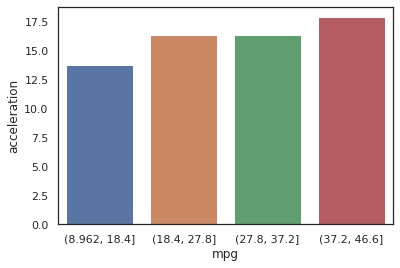

In [ ]:
mpg_acc_graf = sns.barplot(x = 'mpg', y = 'acceleration', data = mpg_acc)

É possivel notar que a acelaração dos carros aumenta com o aumento de mpg.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,continentes,marca,modelo,kml,pesoPotencia
0,18.0,8,307.0,130.0,3504,12.0,1970-01-01,Usa,America do Norte,chevrolet,chevelle malibu,7.653061,26.953846
1,15.0,8,350.0,165.0,3693,11.5,1970-01-01,Usa,America do Norte,buick,skylark 320,6.377551,22.381818
2,18.0,8,318.0,150.0,3436,11.0,1970-01-01,Usa,America do Norte,plymouth,satellite,7.653061,22.906667
3,16.0,8,304.0,150.0,3433,12.0,1970-01-01,Usa,America do Norte,amc,rebel sst,6.802721,22.886667
4,17.0,8,302.0,140.0,3449,10.5,1970-01-01,Usa,America do Norte,ford,torino,7.227891,24.635714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982-01-01,Usa,America do Norte,ford,mustang gl,11.479592,32.441860
394,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe,Europa,vw,pickup,18.707483,40.961538
395,32.0,4,135.0,84.0,2295,11.6,1982-01-01,Usa,America do Norte,dodge,rampage,13.605442,27.321429
396,28.0,4,120.0,79.0,2625,18.6,1982-01-01,Usa,America do Norte,ford,ranger,11.904762,33.227848


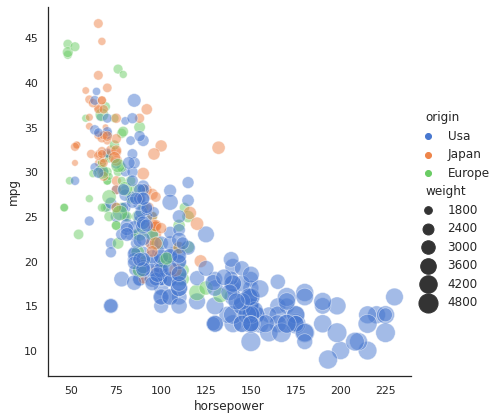

In [ ]:
df['pesoPotencia'] = df['weight']/df['horsepower']

sns.set_theme(style="white")
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data = df)

df

## Contexto historico:
Após grandes periodos de guerra, a Europa e Japão vinham se recurando economicamente. A população necessitava de veiculos baratos e economicos para se locomover. Enquando do outro do mundo, os Usa que ganharam a guerra, estava vivendo uma ascenção econimica em que não precisava se preocupar com os preços do petroleo e com os custos de obra prima.
Olhando o contexto geografico, vemos os Usa com ruas mais largas e muitas auto estradas. Já olhando o cenario no Japão, temos centros mais aglomerados e ruas mais curtas.
Logo se tira de conclusão que as regiões mais afetadas pela guerra, tiveram que produzir veiculos mais economicos, menores e mais baratos.